<a href="https://colab.research.google.com/github/OUCTheoryGroup/colab_demo/blob/master/02_Pytorch_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 什么是 PyTorch ?

PyTorch是一个python库，它主要提供了两个高级功能：

- GPU加速的张量计算
- 构建在反向自动求导系统上的深度神经网络

## 1. 定义数据

一般定义数据使用torch.Tensor  ， tensor的意思是张量，是数字各种形式的总称

In [0]:
import torch

# 可以是一个数
x = torch.tensor(666)
print(x)

tensor(666)


In [0]:
# 可以是一维数组（向量）
x = torch.tensor([1,2,3,4,5,6])
print(x)

tensor([1, 2, 3, 4, 5, 6])


In [0]:
# 可以是二维数组（矩阵）
x = torch.ones(2,3)
print(x)


tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [0]:
# 可以是任意维度的数组（张量）
x = torch.ones(2,3,4)
print(x)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


Tensor支持各种各样类型的数据，包括：

torch.float32, torch.float64, torch.float16, torch.uint8, torch.int8, torch.int16, torch.int32, torch.int64 。这里不过多描述。

创建Tensor有多种方法，包括：ones, zeros, eye, arange, linspace, rand, randn, normal, uniform, randperm, 使用的时候可以在线搜，下面主要通过代码展示。

In [0]:
# 创建一个空张量
x = torch.empty(5,3)
print(x)

tensor([[1.4178e-36, 0.0000e+00, 4.4842e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.0979e-05, 4.2008e-05, 2.1296e+23],
        [1.0386e+21, 4.4160e-05, 1.0742e-05],
        [2.6963e+23, 4.2421e-08, 3.4548e-09]])


In [0]:
# 创建一个随机初始化的张量
x = torch.rand(5,3)
print(x)

tensor([[0.3077, 0.0347, 0.3033],
        [0.9099, 0.2716, 0.4310],
        [0.8286, 0.3317, 0.0536],
        [0.9529, 0.4905, 0.1403],
        [0.6899, 0.8349, 0.4015]])


In [0]:
# 创建一个全0的张量，里面的数据类型为 long
x = torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [0]:
# 基于现有的tensor，创建一个新tensor，
# 从而可以利用原有的tensor的dtype，device，size之类的属性信息
y = x.new_ones(5,3)   #tensor new_* 方法，利用原来tensor的dtype，device
print(y)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [0]:
z = torch.randn_like(x, dtype=torch.float)    # 利用原来的tensor的大小，但是重新定义了dtype
print(z)

tensor([[ 1.4363, -2.1019,  0.4444],
        [-0.4706,  0.7441, -0.4631],
        [-1.3860, -1.8919,  1.8794],
        [ 1.8617,  0.6469,  0.5235],
        [-0.1271, -1.0755,  0.0359]])


## 2. 定义操作

凡是用Tensor进行各种运算的，都是Function

最终，还是需要用Tensor来进行计算的，计算无非是
- 基本运算，加减乘除，求幂求余
- 布尔运算，大于小于，最大最小
- 线性运算，矩阵乘法，求模，求行列式

**基本运算包括：** abs/sqrt/div/exp/fmod/pow ，及一些三角函数 cos/ sin/ asin/ atan2/ cosh，及 ceil/round/floor/trunc 等具体在使用的时候可以百度一下

**布尔运算包括：** gt/lt/ge/le/eq/ne，topk, sort, max/min

**线性计算包括：** trace, diag, mm/bmm，t，dot/cross，inverse，svd 等

不再多说，需要使用的时候百度一下即可。下面用具体的代码案例来学习。

In [0]:
# 创建一个 2x4 的tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])

print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [0]:
# 返回 m 中元素的数量
print(m.numel())

8


In [0]:
# 返回 第0行，第2列的数
print(m[0][2])

tensor(3.)


In [0]:
# 返回 第1列的全部元素
print(m[:, 1])

tensor([5., 2.])


In [0]:
# 返回 第0行的全部元素
print(m[0, :])

tensor([2., 5., 3., 7.])


In [0]:
# Create tensor of numbers from 1 to 5
# 注意这里结果是1到4，没有5
v = torch.arange(1, 5)
print(v)

tensor([1, 2, 3, 4])


In [0]:
# Scalar product
m @ v

tensor([49., 47.])

In [0]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [0]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.2495, 5.7699, 3.3819, 7.0271],
        [4.4853, 2.1948, 1.8039, 9.2615]])

In [0]:
# 转置，由 2x4 变为 4x2
print(m.t())

# 使用 transpose 也可以达到相同的效果，具体使用方法可以百度
print(m.transpose(0, 1))

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])
tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])


In [0]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

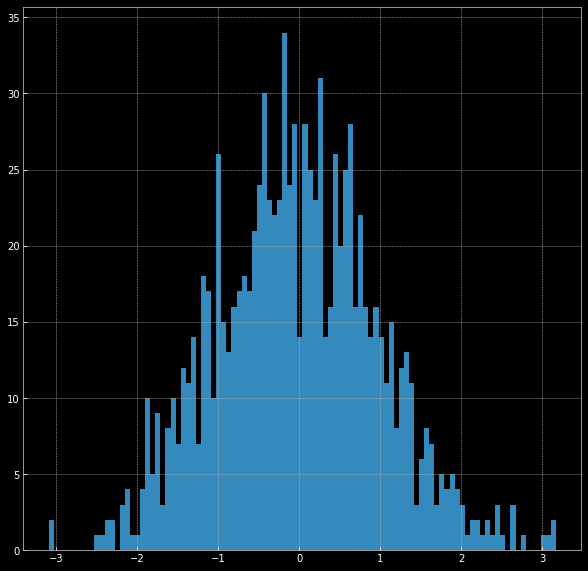

In [0]:
from matplotlib import pyplot as plt

# matlabplotlib 只能显示numpy类型的数据，下面展示了转换数据类型，然后显示
# 注意 randn 是生成均值为 0， 方差为 1 的随机数
# 下面是生成 1000 个随机数，并按照 100 个 bin 统计直方图
plt.hist(torch.randn(1000).numpy(), 100);

1000000


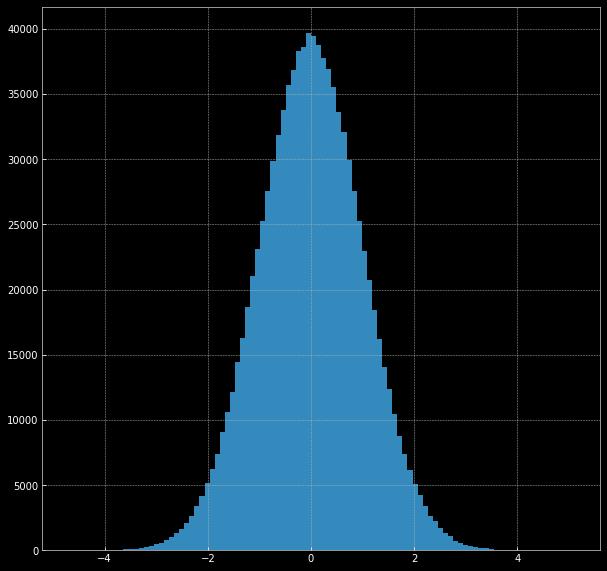

In [0]:
# 当数据非常非常多的时候，正态分布会体现的非常明显
plt.hist(torch.randn(10**6).numpy(), 100);

In [0]:
# 创建两个 1x4 的tensor
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])

# 在 0 方向拼接 （即在 Y 方各上拼接）, 会得到 2x4 的矩阵
print( torch.cat((a,b), 0))

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])


In [0]:
# 在 1 方向拼接 （即在 X 方各上拼接）, 会得到 1x8 的矩阵
print( torch.cat((a,b), 1))

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])


## One more thing ~

其实基本操作还有非常非常多，详细可以查阅官方文档。